In [2]:
DATADIR="/ssd2/arthur/TREC2019/data/"
!ls $DATADIR

dev.datapack			 msmarco-doctrain-top100.gz
index				 msmarco-doctriples.py
msmarco-docdev-qrels.tsv.gz	 mz_datapack
msmarco-docdev-queries.tsv.gz	 sample.trec
msmarco-docdev-top100.gz	 split_msmarco.py
msmarco-docs-lookup.tsv.gz	 splitted-tsv
msmarco-docs.trec		 train.datapack
msmarco-docs.tsv		 train.datapack.processed
msmarco-doctrain-qrels.tsv.gz	 TREC2Matchzhoo.py
msmarco-doctrain-queries.tsv	 triples_dev.tsv
msmarco-doctrain-queries.tsv.gz  triples.tsv


In [11]:
str(line).split("\t")

["b'174249\\tdoes xpress bet charge to deposit money in your account\\r\\n'"]

In [12]:
import os
import gzip
queries_file = os.path.join(DATADIR, "msmarco-docdev-queries.tsv.gz")
lens  = []
for line in gzip.open(queries_file):
    lens.append(len(line.split(b"\t")[1].split()))
    

In [15]:
import numpy as np 
np.mean(lens), np.median(lens), np.std(lens)

(5.891199691892933, 6.0, 2.511116353157464)

In [27]:
" ".join(line.split("\t")[2:])

'The hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.? Science & Mathematics PhysicsThe hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.?It is a good approximation to assume that the emissivity e is equal to 1 for these surfaces.  Find the radius of the star Rigel, the bright blue star in the constellation Orion that radiates energy at a rate of 2.7 x 10^32 W and has a surface temperature of 11,000 K. Assume that the star is spherical. Use σ =... show moreFollow 3 answersAnswersRelevanceRatingNewestOldestBest Answer: Stefan-Boltzmann law states that the energy flux by radiation is proportional to the forth power of the temperature: q = ε · σ · T^4 The total energy flux at a spherical surface of Radius R is Q = q·π·R² = ε·σ·T^4·π·R² Hence the radius is R = √ ( Q / (ε·σ·T^4·π) ) = √ ( 2.7x10+32 W / (1 · 5.67x10-8W/m²K^4 · (1100K)^4 · π) ) = 3.22x10+13 mSource (s):http://en.wikipedia.org/wiki/Stefan_bolt...schmiso · 1 d

In [37]:
docs_file = os.path.join(DATADIR, "msmarco-docs.tsv")
lens  = []
from tqdm import tqdm_notebook as tqdm
for line in tqdm(open(docs_file, encoding="utf-8")):
    full_text = " ".join(line.split("\t")[2:])
    lens.append(len(full_text.split()))


In [38]:
np.mean(lens), np.median(lens), np.std(lens)

(1084.8807160292922, 551.0, 2324.2245817825396)

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt 
lens = np.asarray(lens)

In [55]:
np.median(lens)

551.0

In [60]:
lens_ = lens[lens<2000]

(array([42276., 38806., 44514., 54142., 62180., 64484., 66520., 64897.,
        66221., 65962., 63913., 64070., 64885., 63347., 62866., 62001.,
        62560., 61689., 60450., 57545., 57366., 56386., 57287., 54486.,
        52975., 53428., 51962., 50282., 48188., 46790., 44802., 44421.,
        41417., 38779., 37560., 35667., 34282., 33352., 31765., 30375.,
        28805., 27754., 26648., 25467., 24599., 23902., 22813., 22398.,
        21828., 20944., 20161., 19441., 18717., 18121., 17173., 16502.,
        15979., 15424., 14519., 14484., 14089., 13720., 13046., 12903.,
        12229., 12023., 11482., 10838., 10513., 10286., 10125.,  9797.,
         9830.,  9052.,  9040.,  8843.,  8469.,  8284.,  8187.,  7875.,
         7625.,  7392.,  7209.,  7040.,  7036.,  6765.,  6709.,  6574.,
         6369.,  6011.,  6081.,  5885.,  5879.,  5641.,  5567.,  5486.,
         5395.,  5373.,  5117.,  5043.]),
 array([   0.  ,   19.99,   39.98,   59.97,   79.96,   99.95,  119.94,
         139.93,  159.9

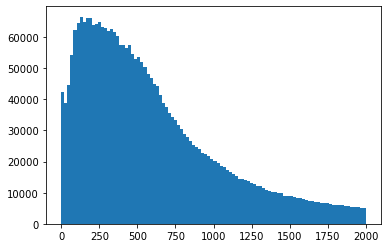

In [61]:
# plt.plot(np.histogram(lens))
plt.hist(lens_, bins=100)